# Audio scattering classification

In this example class, you implement a classifier of sounds based on the wavelet scattering transform coefficients (see [lecture notes](https://researchcomputing.readthedocs.io/en/latest/material/part12/notebook.html#Wavelet-Scattering-Transform)).



## Question 1

What is a wavelet? What is a filter bank? What is a wavelet scattering transform coefficient?

### Solution

Refer to lecture notes. 

## Question 2

Install [kymatio](https://github.com/kymatio/kymatio).

Chose the following values for our wavelet parameters:

- `T=8192`
- `J=6`
- `Q=(16,16)`


Using the `scattering_filter_factory` method of `kymatio.scattering1d.filter_bank`, load the filter bank corresponding to these parameters.

The method is defined [here](https://github.com/kymatio/kymatio/blob/11552ed5533d566e6c60d77eecccb37dfb229dec/kymatio/scattering1d/filter_bank.py#L322).

And the docstring reads:

```
    Builds in Fourier the Morlet filters used for the scattering transform.

    Each single filter is provided as a dictionary with the following keys:
    * 'xi': normalized center frequency, where 0.5 corresponds to Nyquist.
    * 'sigma': normalized bandwidth in the Fourier.
    * 'j': log2 of downsampling factor after filtering. j=0 means no downsampling,
        j=1 means downsampling by one half, etc.
    * 'levels': list of NumPy arrays containing the filter at various levels
        of downsampling. levels[0] is at full resolution, levels[1] at half
        resolution, etc.

    Parameters
    ----------
    N : int
        padded length of the input signal. Corresponds to self._N_padded for the
        scattering object.
    J : int
        log-scale of the scattering transform, such that wavelets of both
        filterbanks have a maximal support that is proportional to 2**J.
    Q : tuple
        number of wavelets per octave at the first and second order
        Q = (Q1, Q2). Q1 and Q2 are both int >= 1.
    T : int
        temporal support of low-pass filter, controlling amount of imposed
        time-shift invariance and maximum subsampling
    filterbank : tuple (callable filterbank_fn, dict filterbank_kwargs)
        filterbank_fn should take J and Q as positional arguments and
        **filterbank_kwargs as optional keyword arguments.
        Corresponds to the self.filterbank property of the scattering object.
        As of v0.3, only anden_generator is supported as filterbank_fn.
    _reduction : callable
        either np.sum (default) or np.mean.

    Returns
    -------
    phi_f, psi1_f, psi2_f ... : dictionaries
        phi_f corresponds to the low-pass filter and psi1_f, psi2_f, to the
        wavelet filterbanks at layers 1 and 2 respectively.
        See above for a description of the dictionary structure.
```

### Solution

In [1]:
from kymatio.scattering1d.filter_bank import scattering_filter_factory

T=8192
J=6
Q=(16,16)

phi_f, psi1_f, psi2_f = scattering_filter_factory(T, J, Q, T)

In [6]:
2**13, 2**6, 

(8192, 64)

## Question 3

Plot the first-order wavelets at original resolution (i.e., $T$ samples) in the frequency domain.

Do an interactive plot for all 63 first-order wavelets in the bank.

Use log-scale for the frequency axis, what do you observe?



In [7]:
len(psi1_f),psi1_f[0]

(63,
 {'levels': [array([ 0.000e+000,  5.929e-322,  1.467e-321, ..., -8.745e-322,
          -6.818e-322, -4.150e-322])],
  'xi': 0.4675543827703947,
  'sigma': 0.012162615274247493,
  'j': 0})

### Solution

In [8]:
from matplotlib import pyplot as plt
import numpy as np


from ipywidgets import interact
import ipywidgets as widgets

def plot_wavelet(wavelet_idx):
    plt.figure(figsize=(10,6))
    psi_f = psi1_f[wavelet_idx]
    t = np.arange(T)/T
    plt.plot(t, np.abs(psi_f['levels'][0]), 'b') # here we index with time array, but this actually corresponds to frequency. 
    plt.title(f'First-order wavelet {wavelet_idx}')
    # plt.xlim(0, len(psi_f['levels'][0]))
    plt.xlim(0.00055, 0.55)
    plt.xscale('log')
    plt.xlabel('frequency')
    plt.grid(True)
    plt.show()

interact(plot_wavelet, 
         wavelet_idx=widgets.IntSlider(
             min=0,
             max=len(psi1_f)-1,
             step=1,
             value=0,
             description='Wavelet Index:'
         ))



interactive(children=(IntSlider(value=0, description='Wavelet Index:', max=62), Output()), _dom_classes=('widg…

<function __main__.plot_wavelet(wavelet_idx)>

We see that the bandwidth of the fileters is generally constant in log-scale. This is because the filters are constant-Q filters.

## Question 4

Do a similar plot, but now in the time domain, using the inverse FFT.

### Solution

In [183]:
def plot_wavelet_time(wavelet_idx):
    plt.figure(figsize=(10,6))
    psi_time = np.fft.ifft(psi1_f[wavelet_idx]['levels'][0])
    psi_real = np.real(psi_time)
    psi_imag = np.imag(psi_time)
    
    # Use fftshift to center the wavelet
    psi_real = np.fft.fftshift(psi_real)
    psi_imag = np.fft.fftshift(psi_imag)
    
    t = np.arange(-len(psi_real)//2, len(psi_real)//2)
    plt.plot(t, psi_real, 'b', label='Real')
    plt.plot(t, psi_imag, 'r', label='Imaginary')
    
    plt.title(f'First-order wavelet {wavelet_idx} (time domain)')
    plt.xlabel('time')
    plt.xlim(-256, 256)
    plt.grid(True)
    plt.legend()
    plt.show()

interact(plot_wavelet_time,
         wavelet_idx=widgets.IntSlider(
             min=0,
             max=len(psi1_f)-1,
             step=1,
             value=62,
             description='Wavelet Index:'
         ))


interactive(children=(IntSlider(value=62, description='Wavelet Index:', max=62), Output()), _dom_classes=('wid…

<function __main__.plot_wavelet_time(wavelet_idx)>

## Question 5

Show the second order wavelets at original resolution in the time domain.

What do you observe?


### Solution

In [184]:
def plot_wavelet_time(wavelet_idx):
    plt.figure(figsize=(10,6))
    psi_time = np.fft.ifft(psi2_f[wavelet_idx]['levels'][0])
    psi_real = np.real(psi_time)
    psi_imag = np.imag(psi_time)
    
    # Use fftshift to center the wavelet
    psi_real = np.fft.fftshift(psi_real)
    psi_imag = np.fft.fftshift(psi_imag)
    
    t = np.arange(-len(psi_real)//2, len(psi_real)//2)
    plt.plot(t, psi_real, 'b', label='Real')
    plt.plot(t, psi_imag, 'r', label='Imaginary')
    
    plt.title(f'First-order wavelet {wavelet_idx} (time domain)')
    plt.xlim(-256, 256)
    plt.grid(True)
    plt.legend()
    plt.show()

interact(plot_wavelet_time,
         wavelet_idx=widgets.IntSlider(
             min=0,
             max=len(psi2_f)-1,
             step=1,
             value=62,
             description='Wavelet Index:'
         ))

interactive(children=(IntSlider(value=62, description='Wavelet Index:', max=62), Output()), _dom_classes=('wid…

<function __main__.plot_wavelet_time(wavelet_idx)>

Here Q is the same in both orders, so the wavelets filters are the same.

## Question 6

Fetch the spoken digit data and plot the goerge time series for digit 0 in an interactive plot.

To fetch the data you can use:

```python
from kymatio.datasets import fetch_fsdd
info_dataset = fetch_fsdd(verbose=True)
```

Then you can access the data via the `info_dataset` object and read the wav files with `scipy.io.wavfile.read`.

### Solution

In [11]:
from kymatio.datasets import fetch_fsdd
info_dataset = fetch_fsdd(verbose=True)

In [12]:
# info_dataset 

In [13]:
import os
person = 'george'
digit = 0

# Count number of files for this person and digit
count = sum(1 for f in info_dataset['files'] if f.startswith(f'{digit}_{person}_'))
print(f"Found {count} recordings of digit {digit} by {person}")


Found 50 recordings of digit 0 by george


In [14]:
from ipywidgets import interact
import scipy.io.wavfile

def plot_digit_recording(tid):
    file_name = f"{digit}_{person}_{tid}.wav"
    file_path = os.path.join(info_dataset['path_dataset'], file_name)
    _, x = scipy.io.wavfile.read(file_path)
    plt.figure(figsize=(12,4))
    plt.plot(x)
    plt.title(f"Recording {tid} of digit {digit} by {person}")
    plt.xlabel("Time sample")
    plt.ylabel("Amplitude")
    plt.show()

interact(plot_digit_recording, tid=(0, count-1))


interactive(children=(IntSlider(value=24, description='tid', max=49), Output()), _dom_classes=('widget-interac…

<function __main__.plot_digit_recording(tid)>

## Question 7

What is the time duration of these signals? Give your answer simply as a number of time samples. 

Is it constant for all recordings?

What is the duration of the signal `0_george_0.wav`?

Store the signal in a variable `x`.

### Solution



In [15]:
tid = 29
file_name = f"{digit}_{person}_{tid}.wav"
file_path = os.path.join(info_dataset['path_dataset'], file_name)
_, x = scipy.io.wavfile.read(file_path)
len(x)

4208

In [16]:
tid = 9
file_name = f"{digit}_{person}_{tid}.wav"
file_path = os.path.join(info_dataset['path_dataset'], file_name)
_, x = scipy.io.wavfile.read(file_path)
len(x)

4602

The time resolution is certainly constant, but the duration varies.

In [17]:
tid = 0
file_name = f"{digit}_{person}_{tid}.wav"
file_path = os.path.join(info_dataset['path_dataset'], file_name)
_, x = scipy.io.wavfile.read(file_path)
len(x)

2384

The signal `0_george_0.wav` has duration 2384. 

## Question 8

We now compute the scattering transform of `0_george_0.wav`.

To do so, use the method `Scattering1D` from `kymatio.torch`. Instantiate it via:

```python
scattering = Scattering1D(J, T, Q)
```

Chose $J=6$ and $Q=16$ (here $Q$ is not a tuple, just a single integer).


What do $J$ and $Q$ control?


Before computing the scattering transform, we need first to convert the array into a torch tensor and then normalize the signal `x` with `max` so it varies between -1 and 1.


Then, compute the scattering transform of `x` via:

```python
Sx = scattering(x)
```

What is the shape of `Sx`? What does each dimension represent?



### Solution

In [18]:
2**6, 2384/2**6

(64, 37.25)

In [19]:
from kymatio.torch import Scattering1D

T = x.shape[-1]
J = 6
Q = 16 

scattering = Scattering1D(J, T, Q)

$J$ sets the averaging scale specified as $2^J$, so for $J=6$ the averaging scale is 64.

$Q$ controls the number of wavelets per frequency octave. Here we have 16 wavelets per octave, which corresponds to a frequency resolution of 1/16th octave.

In [20]:
import torch
x = torch.tensor(x)  # Convert to PyTorch tensor
x = x / torch.max(torch.abs(x))
Sx = scattering(x)

In [21]:
Sx.shape

torch.Size([222, 37])

The result is a tensor of size $(C,\hat{T})$ where $C$ is the number of scattering coefficients (determined by $Q$) and $\hat{T}$ is the number of time samples after averaging due to the transform (hence smaller than $T$), determined by $J$.

Here since $T=2384$ and $J=6$, we have $\hat{T} = \lfloor 2384/2^6 \rfloor = 37$.






In [22]:
T/2**J


37.25

## Question 9

How many scattering coefficients are there in total? How many coefficients of order 0, 1 and 2?

You can access the metadata of the scattering object via `scattering.meta`, and the `order` information by looking at the `order` key.




### Solution

In [23]:
meta = scattering.meta()
meta['order']

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [24]:
len(meta['order']),len(meta['order'][meta['order']==0]),len(meta['order'][meta['order']==1]),len(meta['order'][meta['order']==2])

(222, 1, 63, 158)

There are 222 scattering coefficients in total, 1 of order 0, 63 of order 1 and 158 of order 2.

The coefficient of order 0 represents the average of the signal in windows of size $2^J=64$.

The first-order coefficients represent the average of the modulus of the signal convolved with the first-order wavelets, in windows of size $2^{J}\approx 64$. There are 63 of them, as we saw in Question 3.

The second-order coefficients contains information about interactions of different frequencies in the signal. This is the most interesting part of the scattering transform, and the reason why it is called scattering. There are 158 of them, and this number is determined by $Q$ but set internally in the `kymatio` package. (The formula does not seem to be documented anywhere easily accessible.)


## Question 10

Plot the zeroth-order scattering coefficient, both in a 1d plot and also in an `imshow` plot as a vector. 

### Solution

In [197]:
order0 = np.where(meta['order'] == 0)

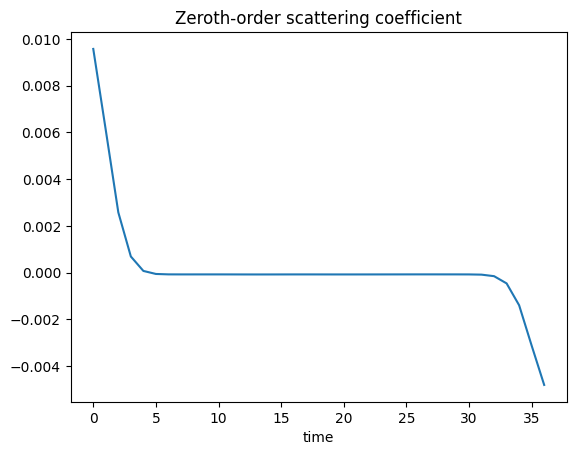

In [198]:
plt.plot(Sx[order0][0])
plt.title('Zeroth-order scattering coefficient')
plt.xlabel('time')
plt.show()



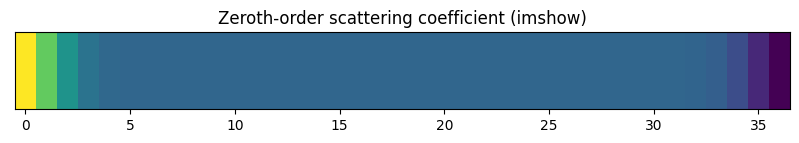

In [114]:
plt.figure(figsize=(10, 1))
plt.yticks([])
plt.imshow(Sx[order0], aspect='auto')
plt.title('Zeroth-order scattering coefficient (imshow)')
plt.show()

## Question 11

Plot the first-order scattering coefficients, both in a 1d plot and also in an `imshow` plot as a matrix.

What is the name of the image plot?


### Solution

Text(0.5, 0, 'time')

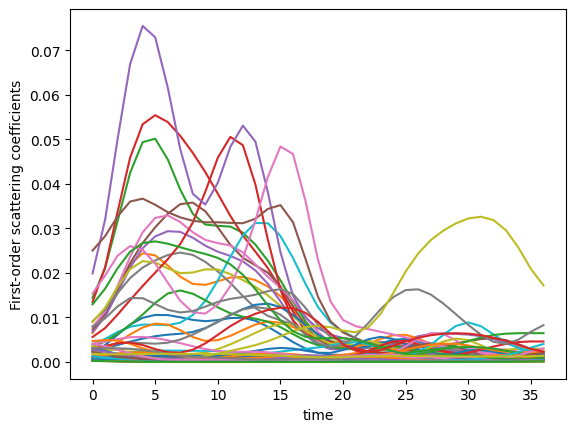

In [199]:
import pandas as pd
order1 = np.where(meta['order'] == 1)
df = pd.DataFrame(Sx[order1].numpy().T)

df.plot(legend=False)
plt.ylabel("First-order scattering coefficients")
plt.xlabel("time")

Text(0.5, 1.0, 'First-order scattering coefficients scalogram')

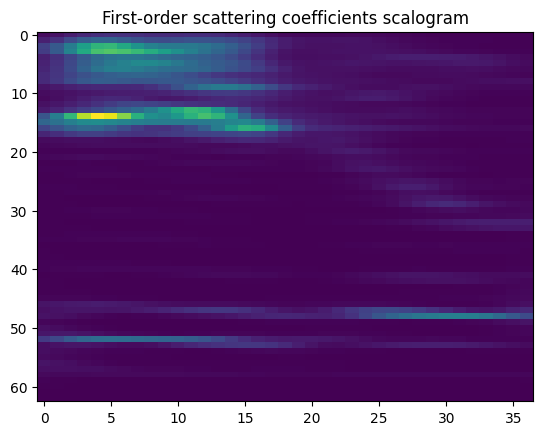

In [200]:
plt.imshow(Sx[order1].numpy(), aspect='auto')
plt.title('First-order scattering coefficients scalogram')

The name of the image plot is a scalogram, it shows the evolution of the signal in both time and (log) frequency.

## Question 12

Plot the second-order scattering coefficients, both in a 1d plot and also in an `imshow` plot as a matrix.


### Solution

Text(0.5, 0, 'time')

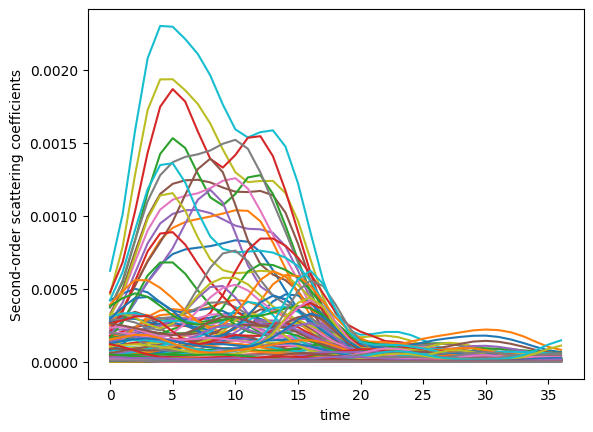

In [201]:
order2 = np.where(meta['order'] == 2)
df = pd.DataFrame(Sx[order2].numpy().T)

df.plot(legend=False)
plt.ylabel("Second-order scattering coefficients")
plt.xlabel("time")

Text(0.5, 1.0, 'Second-order scattering coefficients scalogram')

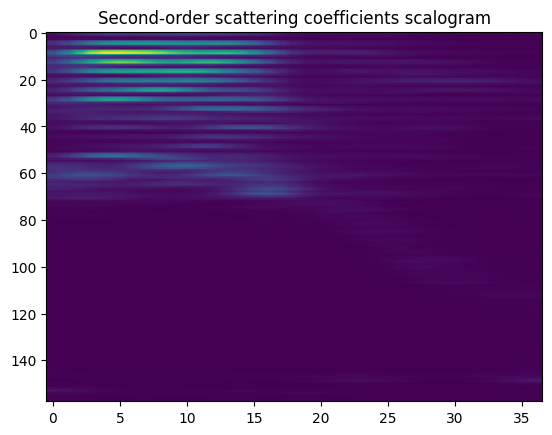

In [202]:

plt.imshow(Sx[order2].numpy(), aspect='auto')
plt.title('Second-order scattering coefficients scalogram')

## Question 13

Using all the  signals in the dataset, test the performance of a logistic regression classifier based on average wavelet scattering coefficients as features.

In the datset, index larger than 5 gets assigned to training set, and the rest to test set (i.e., a 90-10 split).

For the scattering transform, store the data in $T=2^{13}$ samples (i.e., 8192), use $J=8$ and $Q=12$.

The features should be the wavelet scattering coefficients averaged over time, i.e., in the time dimension.


For the model, you can use:

```python
model = Sequential(Linear(num_input, num_classes), LogSoftmax(dim=1))
optimizer = Adam(model.parameters())
criterion = NLLLoss()
```


### Solution

In [25]:
from torch.nn import Linear, NLLLoss, LogSoftmax, Sequential
from torch.optim import Adam
from sklearn.metrics import confusion_matrix

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [26]:
device

device(type='cpu')

In [27]:
torch.manual_seed(42)

In [28]:
T=2**13
J = 8
Q = 12

In [29]:
2**13, 2**8, 2**13/2**8

(8192, 256, 32.0)

In [30]:
# set a small number to avoid singular errors in logs.
log_eps=1e-16


In [31]:
path_dataset= info_dataset['path_dataset']
files=info_dataset['files']

In [32]:
x_all = torch.zeros(len(files), T, dtype=torch.float32, device=device)
y_all = torch.zeros(len(files), dtype=torch.int64, device=device)
subset = torch.zeros(len(files), dtype=torch.int64, device=device)

In [33]:
for k, f in enumerate(files):
    basename = f.split('.')[0]

    # Get label (0-9) of recording.
    y = int(basename.split('_')[0])

    # Index larger than 5 gets assigned to training set.
    if int(basename.split('_')[2]) >= 5:
        subset[k] = 0
    else:
        subset[k] = 1

    # Load the audio signal and normalize it.
    _, x = scipy.io.wavfile.read(os.path.join(path_dataset, f))
    x = np.asarray(x, dtype='float')
    x /= np.max(np.abs(x))

    # Convert from NumPy array to PyTorch Tensor.
    x = torch.from_numpy(x).to(device)

    # If it's too long, truncate it.
    if x.numel() > T:
        x = x[:T]

    # If it's too short, zero-pad it.
    start = (T - x.numel()) // 2

    x_all[k,start:start + x.numel()] = x
    y_all[k] = y

In [34]:
y_all

tensor([5, 3, 1,  ..., 1, 2, 4])

In [35]:
scattering = Scattering1D(J, T, Q).to(device) # the to device is important for GPU compatibility

In [36]:
x_all.shape

torch.Size([3000, 8192])

In [37]:
%%time
Sx_all = scattering(x_all) # can also use  scattering.forward(x_all)

CPU times: user 49.7 s, sys: 53.3 s, total: 1min 42s
Wall time: 40.4 s


In [38]:
Sx_all.shape

torch.Size([3000, 337, 32])

Our full batch of 3000 signals is now over 32 time points and each signal has a scattering transform with a hierarchy of 337 coefficients.


We remove the zeroth order coefficients as they dont carry useful information.

In [39]:
Sx_all = Sx_all[:,1:,:]

Let us log-normalize and regularize:

In [40]:
Sx_all = torch.log(torch.abs(Sx_all) + log_eps)

Average along the time dimension to get a time-shift invariant representation.

In [41]:
Sx_all = torch.mean(Sx_all, dim=-1)
Sx_all.shape

torch.Size([3000, 336])

In [42]:
8192/336

24.38095238095238

We now have a representation of our signals of dimension 336, rather than 8192.


We move on and train a logistic regression classifier. The output of this classifier (based on the logistic function, i.e., sigmoid) is a probablity for belonging to a class (i.e., 0, 1, .., 9).

Get the training data:

In [43]:
Sx_train, y_train = Sx_all[subset == 0], y_all[subset == 0]

In [44]:
y_train, y_train.shape

(tensor([5, 3, 1,  ..., 1, 2, 4]), torch.Size([2700]))

Remenber, our labels in `y_train` are just the spoken digits.


Standardized the data, to mean zero and unit variance:

In [45]:
mu_train = Sx_train.mean(dim=0)
std_train = Sx_train.std(dim=0)
Sx_train = (Sx_train - mu_train) / std_train

In [46]:
num_input = Sx_train.shape[-1]
num_classes = y_train.cpu().unique().numel()
model = Sequential(Linear(num_input, num_classes), LogSoftmax(dim=1))
optimizer = Adam(model.parameters())
criterion = NLLLoss()

In [47]:
model = model.to(device)
criterion = criterion.to(device)

In [48]:
# Number of signals to use in each gradient descent step (batch).
batch_size = 32
# Number of epochs.
num_epochs = 50
# Learning rate for Adam.
lr = 1e-4

In [49]:
nsamples = Sx_train.shape[0]
nbatches = nsamples // batch_size

In [50]:
nbatches,nsamples

(84, 2700)

Train the model:

In [51]:
for e in range(num_epochs):
    # Randomly permute the data. If necessary, transfer the permutation to the
    # GPU.
    perm = torch.randperm(nsamples, device=device)

    # For each batch, calculate the gradient with respect to the loss and take
    # one step.
    for i in range(nbatches):
        idx = perm[i * batch_size : (i+1) * batch_size]
        model.zero_grad()
        resp = model.forward(Sx_train[idx])
        loss = criterion(resp, y_train[idx])
        loss.backward()
        optimizer.step()

    # Calculate the response of the training data at the end of this epoch and
    # the average loss.
    resp = model.forward(Sx_train)
    avg_loss = criterion(resp, y_train)

    # Try predicting the classes of the signals in the training set and compute
    # the accuracy.
    y_hat = resp.argmax(dim=1)
    accuracy = (y_train == y_hat).float().mean()

    print('Epoch {}, average loss = {:1.3f}, accuracy = {:1.3f}'.format(
        e, avg_loss, accuracy))

Epoch 0, average loss = 1.401, accuracy = 0.571
Epoch 1, average loss = 1.134, accuracy = 0.689
Epoch 2, average loss = 0.972, accuracy = 0.766
Epoch 3, average loss = 0.867, accuracy = 0.780
Epoch 4, average loss = 0.779, accuracy = 0.817
Epoch 5, average loss = 0.716, accuracy = 0.835
Epoch 6, average loss = 0.670, accuracy = 0.846
Epoch 7, average loss = 0.640, accuracy = 0.830
Epoch 8, average loss = 0.615, accuracy = 0.843
Epoch 9, average loss = 0.569, accuracy = 0.856
Epoch 10, average loss = 0.549, accuracy = 0.863
Epoch 11, average loss = 0.526, accuracy = 0.871
Epoch 12, average loss = 0.510, accuracy = 0.870
Epoch 13, average loss = 0.490, accuracy = 0.879
Epoch 14, average loss = 0.479, accuracy = 0.874
Epoch 15, average loss = 0.467, accuracy = 0.878
Epoch 16, average loss = 0.446, accuracy = 0.889
Epoch 17, average loss = 0.438, accuracy = 0.892
Epoch 18, average loss = 0.435, accuracy = 0.886
Epoch 19, average loss = 0.428, accuracy = 0.886
Epoch 20, average loss = 0.428

Test the model on the test set:

In [52]:
Sx_test, y_test = Sx_all[subset == 1], y_all[subset == 1]
Sx_test = (Sx_test - mu_train) / std_train

In [53]:
response = model.forward(Sx_test)
avg_loss = criterion(response, y_test)

# Try predicting the labels of the signals in the test data and compute the
# accuracy.

y_hat = response.argmax(dim=1)
accuracy = (y_test == y_hat).float().mean()

print('TEST, average loss = {:1.3f}, accuracy = {:1.3f}'.format(
      avg_loss, accuracy))

TEST, average loss = 0.289, accuracy = 0.913


Show the confusion matrix:

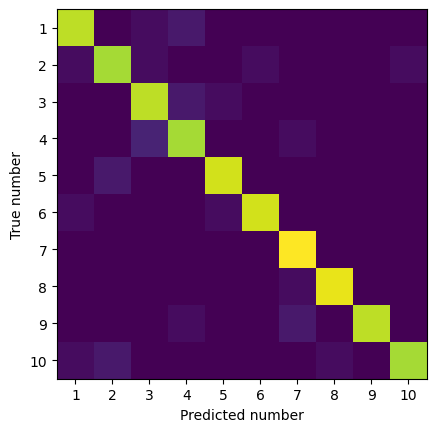

In [54]:
predicted_categories = y_hat.cpu().numpy()
actual_categories = y_test.cpu().numpy()

confusion = confusion_matrix(actual_categories, predicted_categories)
plt.figure()
plt.imshow(confusion)
tick_locs = np.arange(10)
ticks = ['{}'.format(i) for i in range(1, 11)]
plt.xticks(tick_locs, ticks)
plt.yticks(tick_locs, ticks)
plt.ylabel("True number")
plt.xlabel("Predicted number")
plt.show()